In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

import RPDM

In [2]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 293
A_k = 10**(-8)
A_D = 10**(-20)
A_L = 10**(-10)

an1 = 0.2
an2 = 0.1
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 0.5
d_cdl = 1
D_MV = 1
D_OV = 1
k1_0 = 5 * 100   # reactive
k2_0 = 7
k3_0 = 5
k4_0 = 5 * 100   # reactive
k5_0 = 7.5 * 100

A_C = A_k*A_L/A_D
A_t = A_L**2/A_D
A_phi = R*Temp/Ff
phi_ext = 0.3/A_phi

L = 1
T = 1
Nx = 201
n_save = 1000

h = L / (Nx-1)
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2) + 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)

id = 1

path = f'data/{L:.2f}_{k2_0:.1f}_{phi_ext*A_phi:.1f}_{id}/'

201 160001 162


In [3]:
F = RPDM.Film()

F.Nx = Nx
F.n_save = n_save
F.phi_ext = phi_ext
F.L = L
F.T = T
F.D_MV = D_MV
F.D_OV = D_OV
F.k1_0 = k1_0
F.k2_0 = k2_0
F.k3_0 = k3_0
F.k4_0 = k4_0
F.k5_0 = k5_0
F.an1 = an1
F.an2 = an2
F.e_f = e_f
F.e_dl = e_dl
F.e_cdl = e_cdl
F.d_dl = d_dl
F.d_cdl = d_cdl
F.Temp = Temp
F.Ff = Ff
F.e_0 = e_0
F.R = R
F.A_k = A_k
F.A_D = A_D
F.A_L = A_L
F.A_phi = A_phi

F.init()

27

In [4]:
F.solve()

0

In [5]:
C_MV = F.C_MV
print(C_MV.size)
print(C_MV[:])
print(C_MV[-20:])
print(C_MV[-6])

201
[0.00792816 0.04206121 0.07434626 0.10488308 0.13376607 0.16108457
 0.18692309 0.21136159 0.23447574 0.25633711 0.27701342 0.29656875
 0.31506371 0.33255565 0.34909883 0.36474455 0.37954139 0.39353526
 0.40676963 0.4192856  0.43112205 0.44231576 0.45290153 0.46291228
 0.47237914 0.48133157 0.48979742 0.49780304 0.50537337 0.51253199
 0.51930119 0.52570208 0.53175461 0.53747766 0.54288907 0.54800575
 0.55284366 0.55741791 0.56174279 0.56583183 0.56969779 0.57335279
 0.57680825 0.58007499 0.58316324 0.58608269 0.58884249 0.59145129
 0.59391729 0.59624822 0.59845142 0.60053381 0.60250194 0.60436202
 0.6061199  0.60778113 0.60935095 0.61083433 0.61223594 0.61356024
 0.61481141 0.61599342 0.61711002 0.61816477 0.61916102 0.62010194
 0.62099055 0.62182967 0.622622   0.62337008 0.6240763  0.62474294
 0.62537215 0.62596596 0.6265263  0.62705497 0.62755371 0.62802413
 0.62846777 0.62888609 0.62928047 0.6296522  0.63000251 0.63033257
 0.63064348 0.63093627 0.63121194 0.63147141 0.63171556 0.

In [9]:
F.init(mode = 2, C_MV_0 = Data_C_MV[-1], C_OV_0 = Data_C_OV[-1])
F.solve()

0

In [13]:
F.init()
F.solve()

0

In [7]:
print(t_data)

[0.      0.00625 0.0125  0.01875 0.025   0.03125 0.0375  0.04375 0.05
 0.05625 0.0625  0.06875 0.075   0.08125 0.0875  0.09375 0.1     0.10625
 0.1125  0.11875 0.125   0.13125 0.1375  0.14375 0.15    0.15625 0.1625
 0.16875 0.175   0.18125 0.1875  0.19375 0.2     0.20625 0.2125  0.21875
 0.225   0.23125 0.2375  0.24375 0.25    0.25625 0.2625  0.26875 0.275
 0.28125 0.2875  0.29375 0.3     0.30625 0.3125  0.31875 0.325   0.33125
 0.3375  0.34375 0.35    0.35625 0.3625  0.36875 0.375   0.38125 0.3875
 0.39375 0.4     0.40625 0.4125  0.41875 0.425   0.43125 0.4375  0.44375
 0.45    0.45625 0.4625  0.46875 0.475   0.48125 0.4875  0.49375 0.5
 0.50625 0.5125  0.51875 0.525   0.53125 0.5375  0.54375 0.55    0.55625
 0.5625  0.56875 0.575   0.58125 0.5875  0.59375 0.6     0.60625 0.6125
 0.61875 0.625   0.63125 0.6375  0.64375 0.65    0.65625 0.6625  0.66875
 0.675   0.68125 0.6875  0.69375 0.7     0.70625 0.7125  0.71875 0.725
 0.73125 0.7375  0.74375 0.75    0.75625 0.7625  0.76875 0.775   

In [26]:
F.save_x(".")
F.save_t(".")
F.save_C_MV(".")
F.save_C_OV(".")
F.save_phi(".")
F.save_E(".")
F.save_k2(".")

# Visualisation

## General

In [7]:
print(Data_C_MV[-1].size)

NameError: name 'Data_C_MV' is not defined

In [14]:
x = F.x
t_data = F.t_data
Data_C_MV = F.Data_C_MV
Data_C_OV = F.Data_C_OV
Data_phi = F.Data_phi
Data_E = F.Data_E
Data_k2 = F.Data_k2

In [8]:
path = '.'

x = np.loadtxt(path+'/x.txt')
t_data = np.loadtxt(path+'/t_data.txt')
Data_C_MV = np.loadtxt(path+'/Data_C_MV.txt')
Data_C_OV = np.loadtxt(path+'/Data_C_OV.txt')
Data_phi = np.loadtxt(path+'/Data_phi.txt')
Data_E = np.loadtxt(path+'/Data_E.txt')
Data_k2 = np.loadtxt(path+'/Data_k2.txt')

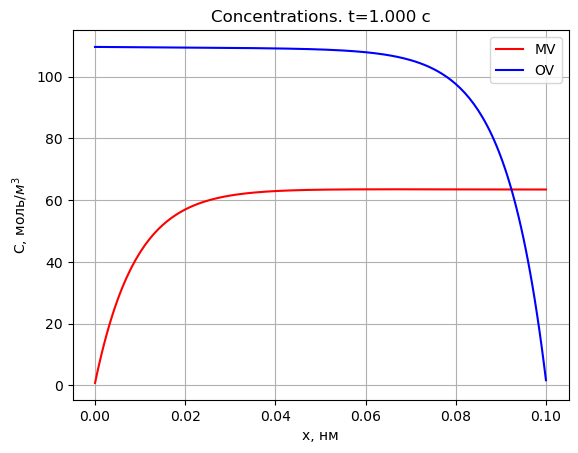

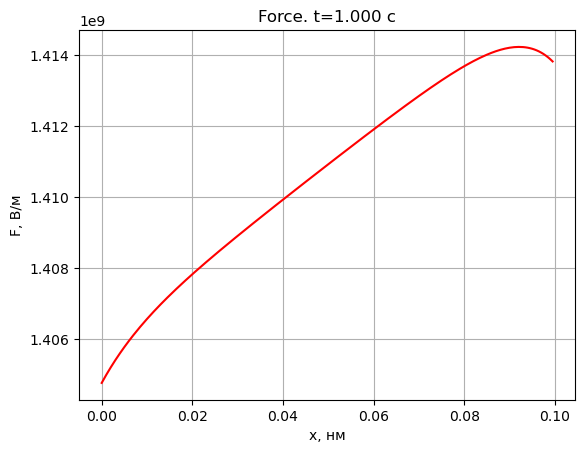

In [15]:
num = -1
plt.plot(x*0.1, Data_C_MV[num]*A_C, 'r', label='MV')
plt.plot(x*0.1, Data_C_OV[num]*A_C, 'b', label='OV')
plt.title(f'Concentrations. t={t_data[num]*A_t:.3f} c')
plt.legend()
plt.xlabel('x, нм')
plt.ylabel(r'C, моль/$м^{3}$')
plt.grid()
#plt.savefig(path+f'C({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
plt.title(f'Force. t={t_data[num]*A_t:.3f} c')
plt.xlabel('x, нм')
plt.ylabel('F, В/м')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
#plt.savefig(path+f'F({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

##       $k_2$ plot

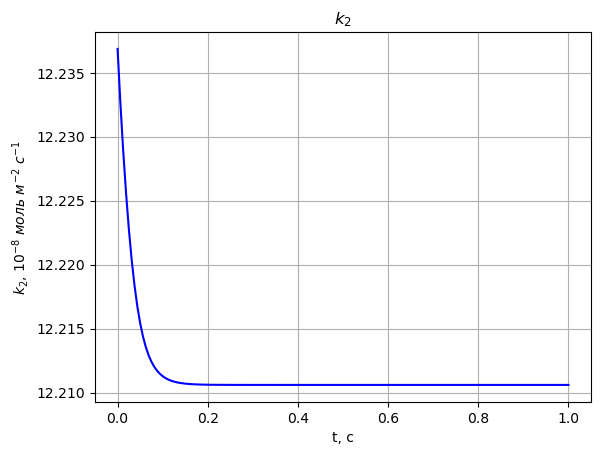

In [16]:
plt.plot(t_data, Data_k2, 'b')
plt.xlabel('t, c')
plt.title(r'$k_2$')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
plt.grid()
#plt.savefig(path+f'k2.png', format='png', dpi=300)
plt.show()

## Concentrarion gifs

In [ ]:
# Concentrarion gifs
Nt_gif = min(4000, Ndata)

C_max = max(np.max(Data_C_MV[:Nt_gif, :]), np.max(Data_C_OV[:Nt_gif, :]))
def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_C_MV[num]*A_c, 'r', label='MV')
    plt.plot(x*0.1, Data_C_OV[num]*A_c, 'b', label='OV')
    plt.title(f'Concentrations. t={t_data[num]*A_t:.3f} c')
    plt.legend()
    plt.ylim([0, A_c * C_max*1.1])
    #plt.xlim([0, L*0.1])
    plt.xlabel('x, нм')
    plt.ylabel(r'C, моль/$м^{3}$')
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+'C.gif', writer='pillow', fps=24)

## Potential gifs

In [ ]:
Nt_gif = min(4000, Ndata)

def update_plot(num):
    plt.cla()
    plt.plot(x*0.1, Data_phi[num]*A_phi, 'b')
    plt.title(f'Potential. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel(r'$\phi$, В')
    plt.ylim([0, phi_ext*1.1*A_phi])
    plt.grid()
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'phi.gif', fps=24)

## Electric field gif

In [ ]:
Nt_gif = min(4000, Ndata)

E_max = np.max(Data_E)
E_min = np.min(Data_E)
def update_plot(num):
    plt.cla()
    plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
    plt.title(f'Electric field. t={t_data[num]*A_t:.3f} c')
    plt.xlabel('x, нм')
    plt.ylabel('E, В/м')
    plt.ylim([A_phi/A_L*E_min*0.95, A_phi/A_L*E_max*1.05])
    plt.grid()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, Nt_gif)
#ani.save(path+f'E.gif', fps=24)